# Use example of NLPD


In [2]:
import sys
import os


## Images

In [3]:

import numpy as np

ImA = np.abs(np.random.rand(128,128,3))
ImB = np.abs(np.random.rand(128,128,3))

# Python

## Matlab-based orignal one

In [ ]:
# If is not installed...
!git clone https://github.com/Valerolaparra/NLPD.git
sys.path.append(os.path.abspath('./NLPD'))

In [4]:
from nlpd_lum import NLPdist_RGB as NLPdist_RGB

In [5]:
# Inputs: RGB single (WHC) images [0-1] range,

dist = NLPdist_RGB(ImA,ImB)

## PyTorch-based metric

In [6]:
from nlpd import LaplacianPyramidGDN as nlpd

In [7]:
# Inputs: RGB single (WHC) images [0-255] range

metric_python = nlpd(k=6)

distance = metric_python.compare(ImA,ImB)

print(distance)

1.3544925


## PyTorch-based fast implementation metric

In [8]:
from nlpd_fast import LaplacianPyramidGDN as nlpd_fast

In [9]:
# Inputs: RGB single (WHC) images [0-255] range
metric_python_fast = nlpd_fast(k=6)

distance = metric_python_fast.compare(ImA,ImB)

print(distance)

1.5870028


# Pytorch (Alex Hepburn)

In [10]:
!git clone https://github.com/Valerolaparra/NLPD_Pytorch

Cloning into 'NLPD_Pytorch'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 28 (delta 0), reused 1 (delta 0), pack-reused 25 (from 1)
Receiving objects: 100% (28/28), 12.73 KiB | 12.73 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [11]:
import sys
import os

sys.path.append(os.path.abspath('./NLPD_Pytorch'))

In [12]:
from NLPD_Pytorch.nlp import LaplacianPyramidGDN as nlpd_pytorch

In [14]:
import torch


# Inputs: RGB batch (NCWH) images [0-1] range
metric_torch = nlpd_pytorch(k=6)

ImA_torch = torch.Tensor(ImA[None]).permute(0, 3, 1, 2)
ImB_torch = torch.Tensor(ImB[None]).permute(0, 3, 1, 2)

distance = metric_torch.compare(ImA_torch,ImB_torch)

print(distance.detach().numpy())

1.3844975


# Tensorflow (Jona Ballé)

In [15]:
!git clone https://github.com/google-research/perceptual-quality.git
%cd perceptual-quality
!pip install -e ./

Cloning into 'perceptual-quality'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 89 (delta 48), reused 72 (delta 31), pack-reused 0 (from 0)
Receiving objects: 100% (89/89), 42.93 KiB | 10.73 MiB/s, done.
Resolving deltas: 100% (48/48), done.
/content/perceptual-quality
Obtaining file:///content/perceptual-quality
  Preparing metadata (setup.py) ... done
  Running setup.py develop for perceptual-quality


In [16]:
sys.path.append(os.getcwd())
from perceptual_quality import nlpd as nlpd_tf
import tensorflow as tf

In [17]:

# Inputs: RGB batch (NCWH) images [0-255] range

random_image_A_tf = 255*ImA
random_image_A_tf = tf.expand_dims(tf.cast(random_image_A_tf,tf.float64), axis= 0)

random_image_B_tf = 255*ImB
random_image_B_tf = tf.expand_dims(tf.cast(random_image_B_tf,tf.float64), axis= 0)

NLPD_tf = np.mean(nlpd_tf.nlpd(random_image_A_tf, random_image_B_tf).numpy())
NLPD_tf_fast = np.mean(nlpd_tf.nlpd_fast(random_image_A_tf, random_image_B_tf).numpy())


# Evaluation in TID2008

In [18]:
from datasets import load_dataset

dataset = load_dataset("Jorgvt/TID2008", trust_remote_code=True)

`trust_remote_code` is not supported anymore.
Please check that the Hugging Face dataset 'Jorgvt/TID2008' isn't based on a loading script and remove `trust_remote_code`.
If the dataset is based on a loading script, please ask the dataset author to remove it and convert it to a standard format like Parquet.
ERROR:datasets.load:`trust_remote_code` is not supported anymore.
Please check that the Hugging Face dataset 'Jorgvt/TID2008' isn't based on a loading script and remove `trust_remote_code`.
If the dataset is based on a loading script, please ask the dataset author to remove it and convert it to a standard format like Parquet.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this

README.md:   0%|          | 0.00/639 [00:00<?, ?B/s]

data/train-00000-of-00005.parquet:   0%|          | 0.00/178M [00:00<?, ?B/s]

data/train-00001-of-00005.parquet:   0%|          | 0.00/179M [00:00<?, ?B/s]

data/train-00002-of-00005.parquet:   0%|          | 0.00/181M [00:00<?, ?B/s]

data/train-00003-of-00005.parquet:   0%|          | 0.00/171M [00:00<?, ?B/s]

data/train-00004-of-00005.parquet:   0%|          | 0.00/169M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1700 [00:00<?, ? examples/s]

In [19]:
len(dataset['train']['mos'])

1700

In [20]:
ImA.max()

np.float64(0.9999728260063954)

In [23]:


N_im = len(dataset['train']['mos']) # 1700

NLPD_torch = np.zeros(N_im)
NLPD_rgb = np.zeros(N_im)
NLPD = np.zeros(N_im)
NLPD_fast = np.zeros(N_im)
NLPD_tf = np.zeros(N_im)
NLPD_tf_fast = np.zeros(N_im)
NLPD_torch = np.zeros(N_im)
RMSE = np.zeros(N_im)
MOS = np.zeros(N_im)

In [24]:

for i in range(N_im):
    ImA = np.array(dataset['train']['reference'][i])/255
    ImB = np.array(dataset['train']['distorted'][i])/255

    MOS[i] = dataset['train']['mos'][i]
    RMSE[i] = np.sqrt(np.mean((ImA-ImB)**2))

    ### PYTHON (Matlab based)
    NLPD_rgb[i] = NLPdist_RGB(ImA,ImB)

    ### PYTHON (Pytorch based)
    #NLPD[i] = metric_python.compare(ImA*255,ImB*255) # This is extremely slow
    NLPD_fast[i] = metric_python_fast.compare(ImA*255,ImB*255)

    ### TENSORFLOW
    random_image_A_tf = 255*ImA
    random_image_A_tf = tf.expand_dims(tf.cast(random_image_A_tf,tf.float64), axis= 0)

    random_image_B_tf = 255*ImB
    random_image_B_tf = tf.expand_dims(tf.cast(random_image_B_tf,tf.float64), axis= 0)

    NLPD_tf[i] = np.mean(nlpd_tf.nlpd(random_image_A_tf, random_image_B_tf).numpy())
    NLPD_tf_fast[i] = np.mean(nlpd_tf.nlpd_fast(random_image_A_tf, random_image_B_tf).numpy())

    ### PYTORCH
    ImA_torch = torch.Tensor(255*ImA[None]).permute(0, 3, 1, 2)
    ImB_torch = torch.Tensor(255*ImB[None]).permute(0, 3, 1, 2)

    NLPD_torch[i] = metric_torch.compare(ImA_torch,ImB_torch)

    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Text(0.5, 1.0, 'NLPD torch corr: 0.82')

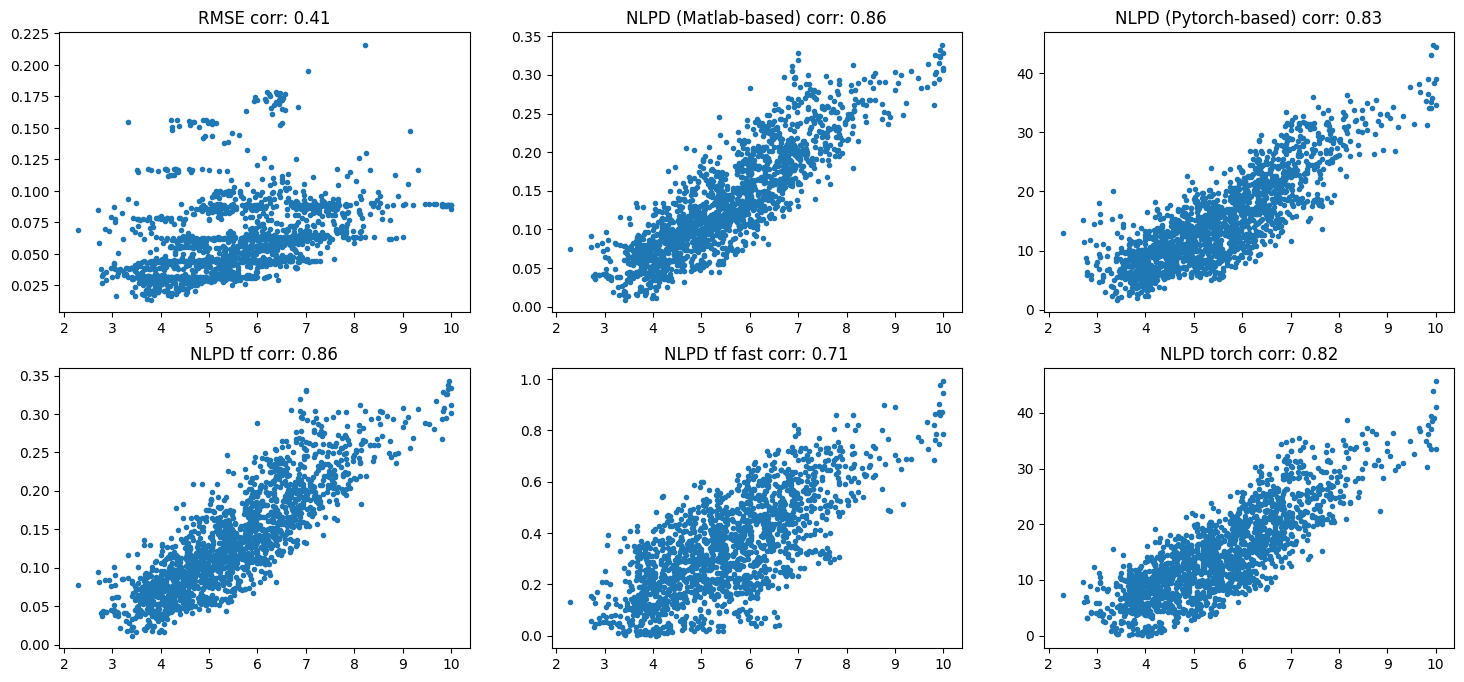

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,8))
plt.subplot(2,3,1)
plt.plot(10-MOS,RMSE,'.')
plt.title('RMSE corr: ' + str(np.round(np.corrcoef(10-MOS,RMSE)[0,1],2)))

plt.subplot(2,3,2)
plt.plot(10-MOS,NLPD_rgb,'.')
plt.title('NLPD (Matlab-based) corr: ' + str(np.round(np.corrcoef(10-MOS,NLPD_rgb)[0,1],2)))

plt.subplot(2,3,3)
plt.plot(10-MOS,NLPD_fast,'.')
plt.title('NLPD (Pytorch-based) corr: ' + str(np.round(np.corrcoef(10-MOS,NLPD_fast)[0,1],2)))

plt.subplot(2,3,4)
plt.plot(10-MOS,NLPD_tf,'.')
plt.title('NLPD tf corr: ' + str(np.round(np.corrcoef(10-MOS,NLPD_tf)[0,1],2)))

plt.subplot(2,3,5)
plt.plot(10-MOS,NLPD_tf_fast,'.')
plt.title('NLPD tf fast corr: ' + str(np.round(np.corrcoef(10-MOS,NLPD_tf_fast)[0,1],2)))

plt.subplot(2,3,6)
plt.plot(10-MOS,NLPD_torch,'.')
plt.title('NLPD torch corr: ' + str(np.round(np.corrcoef(10-MOS,NLPD_torch)[0,1],2)))